# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The following 2 cells are converted to Markdown cells so we don't accidentally download the dataset again when restarting the kernel

!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip

!unzip traffic-signs-data.zip

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, Y_train = train['features'], train['labels']
X_test, Y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(Y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Indexes:  [28883, 7657, 490, 5940, 38156, 2288, 5500, 6450, 23241, 15519, 1142, 2019, 1038, 22681, 31735, 30379, 9735, 5982, 11999, 7498, 958, 32970, 31899, 16372, 4231, 35460, 30533]
Labels: [25  4  1  3 39  1  3  4 15 10  1  1  1 14 30 26  5  3  8  4  1 32 30 10  2
 36 26]


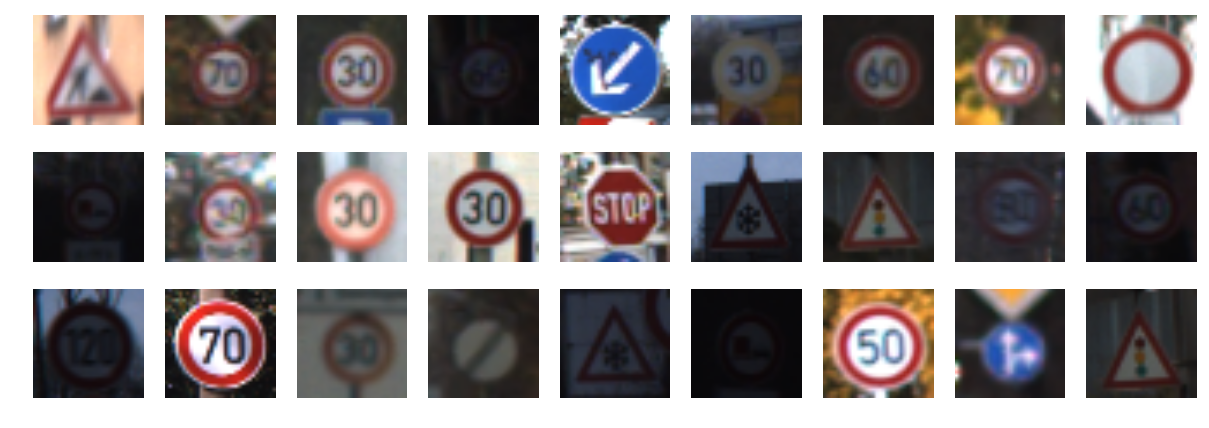

In [4]:
import random

random.seed(1234)

indexes = []

plt.figure(figsize=(15,5))

for b in range(1, 28):
    plt.subplot(3,9, b)
    i = random.randint(0, n_train)
    indexes.append(i)
    _ = plt.imshow(X_train[i])
    plt.axis('off')
    
print("Indexes: ", indexes)
print("Labels:", Y_train[indexes])

Figure number 17 (1-index) seems to be 30 km/h but..

In [5]:
Y_train[indexes[16]]

5

WTF??
If human can not see, machine can not see.

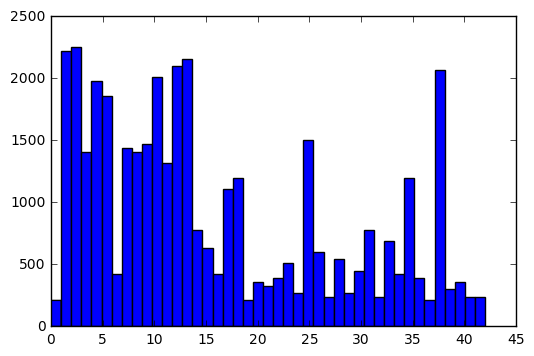

In [6]:
ret = plt.hist(Y_train, bins=n_classes)

This is a extremely unbalanced dataset -> problems are comming.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
# From the histogram
ret

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

In [9]:
print(np.mean(ret[0]))
print(np.median(ret[0]))

911.837209302
600.0


In [10]:
# Note: this is another useful command to achieve the same
np.bincount(Y_train)

array([ 210, 2220, 2250, 1410, 1980, 1860,  420, 1440, 1410, 1470, 2010,
       1320, 2100, 2160,  780,  630,  420, 1110, 1200,  210,  360,  330,
        390,  510,  270, 1500,  600,  240,  540,  270,  450,  780,  240,
        689,  420, 1200,  390,  210, 2070,  300,  360,  240,  240])

Let's resample the training set so all classes have 600 elements.

In [11]:
# We cannot horizontally flip the image, as the meaning of the signal could change or directly have no sense in real-life
# So we can work with rotations, shifts, illumination changes, gaussian noise, blurring ..

In [12]:
import cv2

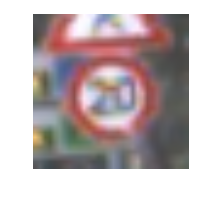

In [13]:
laboratory_rat = X_train[0]

def plot_sign(img):
    plt.figure(figsize=(2,2))
    _ = plt.imshow(img)
    _ = plt.axis('off')

plot_sign(laboratory_rat)

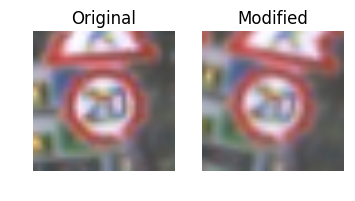

In [14]:
def rotateImage(image, *args):
    # We are going to allow a maximum angle of +-15
    if len(args):
        angle = args[0]
        angle = np.clip(angle, -15, 15)
    else:
        angle = np.random.uniform(-15, 15+1)
    
    image_center = tuple(np.array(image.shape)/2)
    rot_mat = cv2.getRotationMatrix2D(image_center[:2],angle,1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[:2], borderMode=cv2.BORDER_REFLECT_101)
    return result

def plot_sign_compare(img1, img2):
    plt.figure(figsize=(4,10))
    plt.subplot("121")
    plt.title("Original")
    _ = plt.imshow(img1)
    _ = plt.axis('off')
    plt.subplot("122")
    plt.title("Modified")
    _ = plt.imshow(img2)
    _ = plt.axis('off')
    
res = rotateImage(laboratory_rat, -15)
plot_sign_compare(laboratory_rat, res)

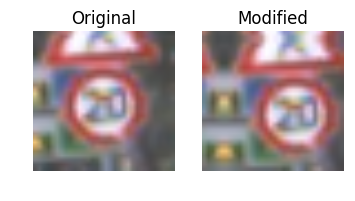

In [15]:
def shift(image, *args):
    # We are going to allow a maximum shift of +-5
    if len(args):
        x_shift = args[0]
        y_shift = args[1]
        x_shift = np.clip(x_shift, -5, 5)
        y_shift = np.clip(y_shift, -5, 5)
    else:
        x_shift = np.random.uniform(-5, 5+1)
        y_shift = np.random.uniform(-5, 5+1)
    
    image_center = tuple(np.array(image.shape)/2)
    shift_mat = np.array([[1, 0, x_shift], [0, 1, y_shift]], dtype=np.float64)
    result = cv2.warpAffine(image, shift_mat, image.shape[:2], borderMode=cv2.BORDER_REFLECT)
    return result

res = shift(laboratory_rat, 5, 2)
plot_sign_compare(laboratory_rat, res)

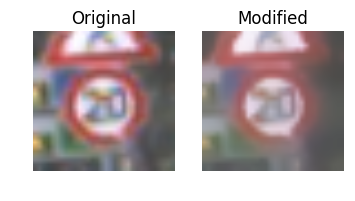

In [16]:
def bilateralFilter(image, *args):
    return cv2.bilateralFilter(image,9,75,75)

res = bilateralFilter(laboratory_rat)
plot_sign_compare(laboratory_rat, res)
#plot_sign(10*(laboratory_rat-res))

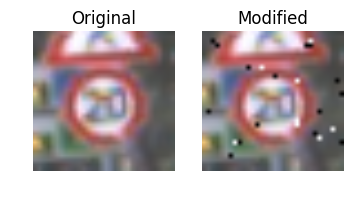

In [17]:
def salt_and_pepper(image, *args):
    salt_th = 253
    pepper_th = 3
    
    noise = np.random.randint(0, 256, image.shape[:2])
    salt_noise = noise > salt_th
    pepper_noise = noise < pepper_th
    
    result = image.copy()
    #result[salt_noise] = (255,255,255)
    result[salt_noise] = 255
    #result[pepper_noise] = (0,0,0)
    result[pepper_noise] = 0
    
    return result
    

res = salt_and_pepper(laboratory_rat)
plot_sign_compare(laboratory_rat, res)

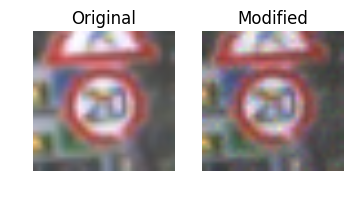

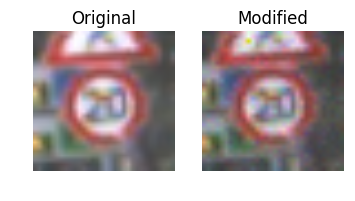

In [18]:
def speckle_noise(image, *args):
    gaussian = np.random.randn(*image.shape)
    #noisy = image + image * gaussian
    noisy = cv2.addWeighted(image.astype(np.float64), 0.9, image * gaussian, 0.05, 0.0)
    noisy = noisy.astype(np.uint8)
    return noisy

def speckle_noise2(image):
    gaussian = np.random.randn(*image.shape[:2])
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = cv2.addWeighted(hsv[:,:,2].astype(np.float64), 0.9, hsv[:,:,2] * gaussian, 0.05, 1.0)
    noisy = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    noisy = noisy.astype(np.uint8)
    return noisy
    
res = speckle_noise(laboratory_rat)
plot_sign_compare(laboratory_rat, res)

res2 = speckle_noise(laboratory_rat)
plot_sign_compare(laboratory_rat, res2)

Results obtained by speckle_noise and speckle_noise2 are very similar, hence we choose speckle_noise (less computations)

In [19]:
transformations = [rotateImage, shift, bilateralFilter, salt_and_pepper, speckle_noise]

We have now 5 possible transformations to apply to our images. Mmm... maybe we can increase to get 1000 samples instead just 600. Let's try.

In [20]:
import random

limit = 1000
X_train_balanced = []
Y_train_balanced = []
classes = list(set(Y_train))
demos = []

for clas in classes:
    # First add all the original samples of this class.
    X = []
    Y = []
    synthetic = []
    
    for image, label in zip(X_train, Y_train): # In Python 3, this returns an iterator. Doesn't create list(tuples) 
        if label == clas:
            X.append(image)
    
    Y += len(X)*[clas]
    
    if len(X) > limit:
        X = X[:limit] # Undersampling
        Y = Y[:limit]
    else:
        # Now it's time to go through all the examples and perform data augmentation of them until we reach the limit.

        # The best way is to apply one transformation to all the original samples, then if we didn't reach the limit yet, 
        # we apply the second transformation and so on. If we go sample by sample aplying all the transformation we will
        # get a dataset much more correlated than using this way of proceeding.

        for trans in transformations:
            for image in X:
                if len(X) + len(synthetic) < limit:
                    synthetic.append(trans(image))
                else:
                    break

        X += synthetic
        Y += len(synthetic)*[clas]
        
        # For visualization purposes
        demos.append(X[0])
        demos += random.sample(synthetic, 2)

    
    # This class is done, let's add it to the final list
    # Append will make a list of list. This is the best solution for both efficiency and for having a flat list
    # http://stackoverflow.com/questions/25216962/python-concatenation-vs-append-speed-on-lists
    X_train_balanced += X 
    Y_train_balanced += Y
    
    
# After this process, all the samples are ordered, don't forget to randomize them later

# Time to convert these list into big ndarray s
X_train_balanced = np.array(X_train_balanced)
Y_train_balanced = np.array(Y_train_balanced)

In [21]:
X_train_balanced.shape

(43000, 32, 32, 3)

In [22]:
Y_train_balanced.shape

(43000,)

The dataset is balanced now?

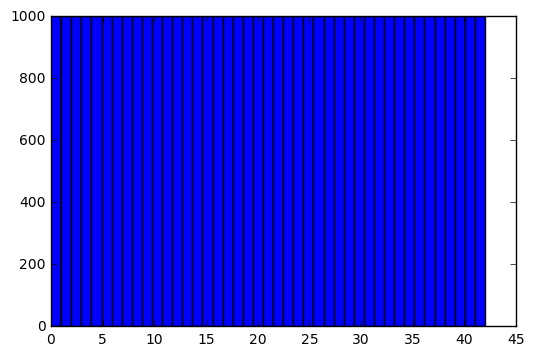

In [23]:
_ = plt.hist(Y_train_balanced, bins=n_classes)

Let's plot some of the augmented images:

In [24]:
len(demos)

78

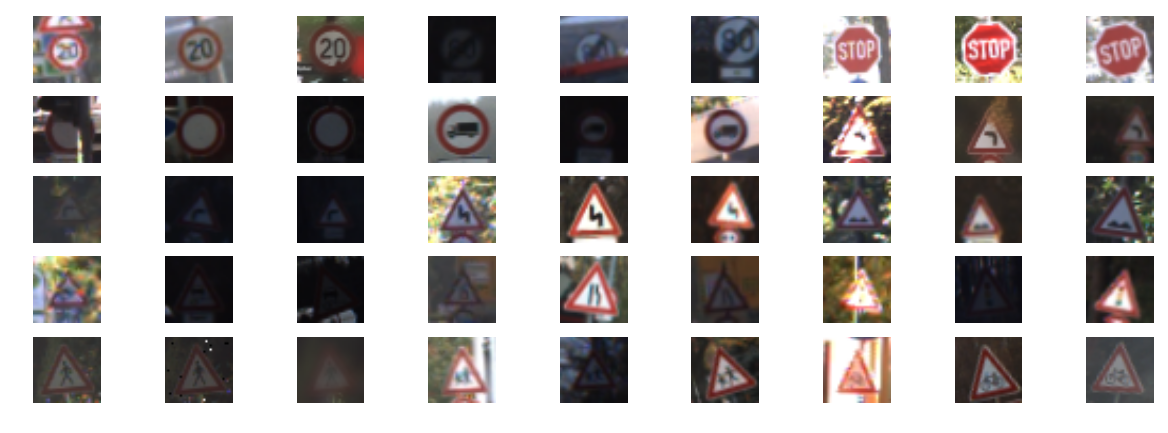

In [25]:
plt.figure(figsize=(15,5))

for b in range(1, 45+1):
    plt.subplot(5,9, b)
    _ = plt.imshow(demos[b-1])
    plt.axis('off')

Now we can preprocess all images. We are going to do a (max/min) normalization.

In [26]:
def normalization(image):
    normalized_image = (image - image.min()) / (image.max() - image.min())
    return normalized_image

X_train_balanced = [normalization(elem) for elem in X_train_balanced]

Now let's split randomly the training set in train and validation, but preserving the balance in each class

In [27]:
from sklearn.model_selection import train_test_split
X_train_split, X_validation_split, Y_train_split, Y_validation_split = train_test_split(X_train_balanced, Y_train_balanced ,test_size=0.2, random_state=42 ,stratify=Y_train_balanced)

Visualize the data to see that both partitions are balanced

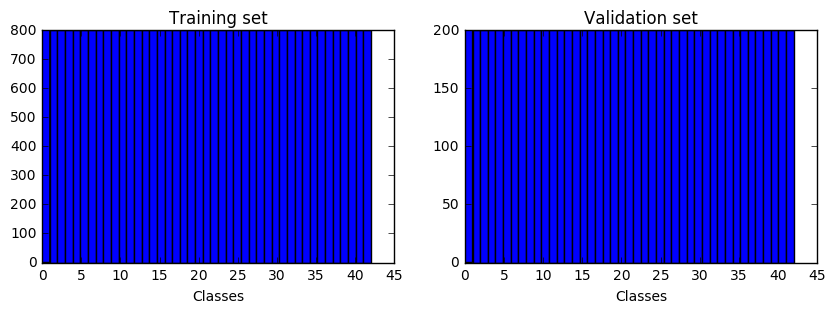

In [28]:
plt.figure(figsize=(10,3))
plt.subplot("121")
_ = plt.title("Training set")
_ = plt.hist(Y_train_split, bins=n_classes)
_ = plt.xlabel("Classes")
plt.subplot("122")
_ = plt.title("Validation set")
_ = plt.hist(Y_validation_split, bins=n_classes)
_ = plt.xlabel("Classes")

Ready, we can start working with the model

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [63]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

First of all, I needed to fix the imbalancedness issue. Otherwise I would not be able to achieve anything significant. To do that, I applied a combination of undersampling and upsampling using several transformations such as rotateImage, shift, bilateralFilter, salt_and_pepper, speckle_noise. Data augmentation should be use carefully. It's a nice tool to increase your dataset, however, the new samples are highly correlated with the original dataset. Also, another goog property of data augmentation is increasing the robustness of the model, as you are teaching it that two images mean the same despite having random shifts, gaussian noise, etc

After solving that, I realized each image has different lightning conditions (some of them were so dark that was difficult for me to classify), thus a normalization process was the correct step. I use a normalization technique called min-max scaling. While standardization is another good one, for this case I prefered min-max scaling in order to ensure a fixed range for all the image pixels.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [30]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

The testing data remains the same. After the preprocessing, I split the training dataset in 2 splits: training (80% of data) and validation (20%) so I can tune different hyperparameters without overfittint to the test set.

The other questions related to additional data generation were adresses in Question 1.

In [46]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weights1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 6], mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(6))
    strides1 = [1, 1, 1, 1]
    padding1 = 'VALID'
    
    layer1 = tf.nn.conv2d(x, weights1, strides1, padding1) 
    layer1 = tf.nn.bias_add(layer1, bias1)
    
    # TODO: Activation.
    layer1 = tf.nn.relu(layer1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksizep1 = [1, 2, 2, 1]
    stridesp1 = [1, 2, 2, 1]
    paddingp1 = 'VALID'
    
    layer1 = tf.nn.max_pool(layer1, ksizep1, stridesp1, paddingp1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weights2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    bias2 = tf.Variable(tf.zeros(16))
    strides2 = [1, 1, 1, 1]
    padding2 = 'VALID'

    layer2 = tf.nn.conv2d(layer1, weights2, strides2, padding2)
    layer2 = tf.nn.bias_add(layer2, bias2)
    
    # TODO: Activation.
    layer2 = tf.nn.relu(layer2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ksizep2 = [1, 2, 2, 1]
    stridesp2 = [1, 2, 2, 1]
    paddingp2 = 'VALID'
    
    layer2 = tf.nn.max_pool(layer2, ksizep2, stridesp2, paddingp2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2_flat = flatten(layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weights3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    bias3 = tf.Variable(tf.zeros(120))
    
    layer3 = tf.matmul(layer2_flat, weights3) + bias3
    
    # TODO: Activation.
    layer3 = tf.nn.relu(layer3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    bias4 = tf.Variable(tf.zeros(84))
    
    layer4 = tf.matmul(layer3, weights4) + bias4
    
    # TODO: Activation.
    layer4 = tf.nn.relu(layer4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    weights5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    bias5 = tf.Variable(tf.zeros(43))
    
    layer5 = tf.matmul(layer4, weights5) + bias5
    logits = layer5
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [32]:
### Train your model here.
### Feel free to use as many code cells as needed.

I read that LeNet was a good starting point, so after preparing the experimental setup, I used that network for training my model. It consist of 2 convolutional layers followed by 3 fully connected. A maxpool layer was used after each convolutional one. After some tests, I achieve good results (over 80% in test set) but I spot overfitting isues, thus I modified a bit the architecture introducing dropout between the fully connected layers. This together with an increase of epochs allowed my to achieve a 92'8% of accuracy in test set. I guess that using a higher dropout combined with a learning rate schedule and early stopping could lead to a nice improvement (over 95% ?).

In [33]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [34]:
rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [35]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [37]:
from sklearn.utils import shuffle

ls_training_accuracy = []
ls_validation_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_split)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_t, Y_t = shuffle(X_train_split, Y_train_split)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_t[offset:end], Y_t[offset:end]
        
            if len(batch_x): # As BATCH_SIZE is not a divisor of X_train_split it raises an error if this is not checked
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train_split, Y_train_split)
        validation_accuracy = evaluate(X_validation_split, Y_validation_split)
        
        ls_training_accuracy.append(training_accuracy)
        ls_validation_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.778
Validation Accuracy = 0.777

EPOCH 2 ...
Training Accuracy = 0.872
Validation Accuracy = 0.862

EPOCH 3 ...
Training Accuracy = 0.915
Validation Accuracy = 0.902

EPOCH 4 ...
Training Accuracy = 0.931
Validation Accuracy = 0.914

EPOCH 5 ...
Training Accuracy = 0.948
Validation Accuracy = 0.933

EPOCH 6 ...
Training Accuracy = 0.971
Validation Accuracy = 0.952

EPOCH 7 ...
Training Accuracy = 0.964
Validation Accuracy = 0.944

EPOCH 8 ...
Training Accuracy = 0.974
Validation Accuracy = 0.951

EPOCH 9 ...
Training Accuracy = 0.984
Validation Accuracy = 0.962

EPOCH 10 ...
Training Accuracy = 0.986
Validation Accuracy = 0.960

Model saved


Let's plot acuracy through epochs so we can spot what is going on during the training process. In rigor, we should plot loss, but this give us the same insights from the training process.

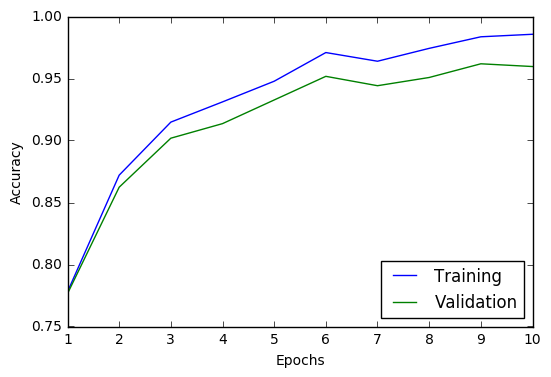

In [42]:
plt.plot(range(1,len(ls_training_accuracy)+1), ls_training_accuracy, 'b')
plt.xticks(range(1,len(ls_training_accuracy)+1))
plt.hold(True)
plt.plot(range(1,len(ls_training_accuracy)+1), ls_validation_accuracy, 'g')
plt.hold(False)
_ = plt.legend(("Training", "Validation"), loc='lower right')
_ = plt.ylabel("Accuracy")
_ = plt.xlabel("Epochs")

In [45]:
print(ls_training_accuracy)
print(ls_validation_accuracy)

[0.77796511633451593, 0.8720348836654841, 0.91482558133990266, 0.9311337209856787, 0.9477906977298648, 0.97093023255813948, 0.96392441866009737, 0.9743023255813954, 0.9836337209302326, 0.98566860459571659]
[0.77651162785153061, 0.86232558139534887, 0.90186046506083284, 0.91360465116279066, 0.93267441854920496, 0.95174418604651168, 0.94418604645618176, 0.95081395343292596, 0.96186046506083289, 0.95965116273525153]


Let's evaluate in test set

In [43]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.820


And don't forget to apply normalization first!!!!

In [44]:
X_test = [normalization(elem) for elem in X_test]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.870


We can achieve better results on test for sure. If we do training more epochs the model will perfectly learn the training set but probably we will have a worse result on validation. The problem we find in test is that the generalization process is not good enough -> Let's train for 30 epochs using dropout as a regularizer, and see what happen.

In [54]:
# Dropout was introduced at the output of layer 3 and layer 4
keep_prob = tf.placeholder(tf.float32)
    
def LeNet_dropout(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weights1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 6], mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(6))
    strides1 = [1, 1, 1, 1]
    padding1 = 'VALID'
    
    layer1 = tf.nn.conv2d(x, weights1, strides1, padding1) 
    layer1 = tf.nn.bias_add(layer1, bias1)
    
    # TODO: Activation.
    layer1 = tf.nn.relu(layer1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksizep1 = [1, 2, 2, 1]
    stridesp1 = [1, 2, 2, 1]
    paddingp1 = 'VALID'
    
    layer1 = tf.nn.max_pool(layer1, ksizep1, stridesp1, paddingp1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weights2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    bias2 = tf.Variable(tf.zeros(16))
    strides2 = [1, 1, 1, 1]
    padding2 = 'VALID'

    layer2 = tf.nn.conv2d(layer1, weights2, strides2, padding2)
    layer2 = tf.nn.bias_add(layer2, bias2)
    
    # TODO: Activation.
    layer2 = tf.nn.relu(layer2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ksizep2 = [1, 2, 2, 1]
    stridesp2 = [1, 2, 2, 1]
    paddingp2 = 'VALID'
    
    layer2 = tf.nn.max_pool(layer2, ksizep2, stridesp2, paddingp2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2_flat = flatten(layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weights3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    bias3 = tf.Variable(tf.zeros(120))
    
    layer3 = tf.matmul(layer2_flat, weights3) + bias3
    
    # TODO: Activation.
    layer3 = tf.nn.relu(layer3)
    
    # Dropout
    layer3 = tf.nn.dropout(layer3, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    bias4 = tf.Variable(tf.zeros(84))
    
    layer4 = tf.matmul(layer3, weights4) + bias4
    
    # TODO: Activation.
    layer4 = tf.nn.relu(layer4)
    
    # Dropout
    layer4 = tf.nn.dropout(layer4, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    weights5 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    bias5 = tf.Variable(tf.zeros(43))
    
    layer5 = tf.matmul(layer4, weights5) + bias5
    logits = layer5
    
    return logits

In [55]:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 128

logits = LeNet_dropout(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [56]:
def evaluate_with_dropout(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [57]:
ls_training_accuracy = []
ls_validation_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_split)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_t, Y_t = shuffle(X_train_split, Y_train_split)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_t[offset:end], Y_t[offset:end]
        
            if len(batch_x): # As BATCH_SIZE is not a divisor of X_train_split it raises an error if this is not checked
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        training_accuracy = evaluate_with_dropout(X_train_split, Y_train_split)
        validation_accuracy = evaluate_with_dropout(X_validation_split, Y_validation_split)
        
        ls_training_accuracy.append(training_accuracy)
        ls_validation_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet_dropout')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.568
Validation Accuracy = 0.563

EPOCH 2 ...
Training Accuracy = 0.751
Validation Accuracy = 0.747

EPOCH 3 ...
Training Accuracy = 0.843
Validation Accuracy = 0.833

EPOCH 4 ...
Training Accuracy = 0.872
Validation Accuracy = 0.864

EPOCH 5 ...
Training Accuracy = 0.887
Validation Accuracy = 0.879

EPOCH 6 ...
Training Accuracy = 0.908
Validation Accuracy = 0.902

EPOCH 7 ...
Training Accuracy = 0.924
Validation Accuracy = 0.917

EPOCH 8 ...
Training Accuracy = 0.929
Validation Accuracy = 0.920

EPOCH 9 ...
Training Accuracy = 0.935
Validation Accuracy = 0.924

EPOCH 10 ...
Training Accuracy = 0.941
Validation Accuracy = 0.932

EPOCH 11 ...
Training Accuracy = 0.949
Validation Accuracy = 0.938

EPOCH 12 ...
Training Accuracy = 0.953
Validation Accuracy = 0.938

EPOCH 13 ...
Training Accuracy = 0.954
Validation Accuracy = 0.942

EPOCH 14 ...
Training Accuracy = 0.958
Validation Accuracy = 0.944

EPOCH 15 ...
Training Accuracy = 0.962
Valid

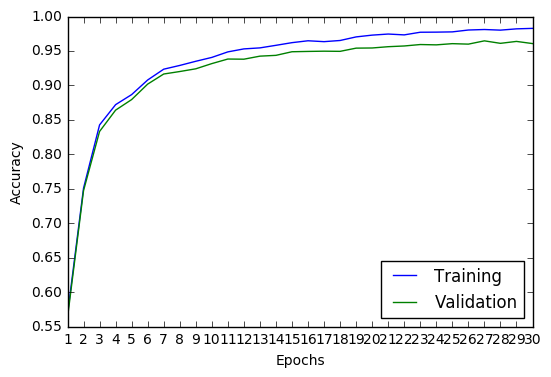

In [58]:
plt.plot(range(1,len(ls_training_accuracy)+1), ls_training_accuracy, 'b')
plt.xticks(range(1,len(ls_training_accuracy)+1))
plt.hold(True)
plt.plot(range(1,len(ls_training_accuracy)+1), ls_validation_accuracy, 'g')
plt.hold(False)
_ = plt.legend(("Training", "Validation"), loc='lower right')
_ = plt.ylabel("Accuracy")
_ = plt.xlabel("Epochs")

In [60]:
print(ls_training_accuracy)
print(ls_validation_accuracy)

[0.56758720935777174, 0.75078488377637642, 0.84261627912521364, 0.8720348836654841, 0.88662790703219041, 0.90784883720930232, 0.92351744180501893, 0.92895348842753922, 0.93500000005544615, 0.9406104651162791, 0.94863372098567877, 0.95296511622362357, 0.95444767447405088, 0.95816860470660892, 0.96203488366548406, 0.96476744180501894, 0.96348837203757709, 0.96517441866009734, 0.9703779070321904, 0.97296511627906979, 0.97453488372093022, 0.97331395348837213, 0.97715116273525149, 0.97729651162790698, 0.97767441860465121, 0.98037790697674421, 0.98110465116279066, 0.98020348837209303, 0.98206395348837205, 0.98276162790697674]
[0.56267441860465117, 0.74720930232558136, 0.83313953488372094, 0.86406976749730668, 0.87941860470660893, 0.90186046511627904, 0.91651162785153051, 0.92011627901432125, 0.92406976738641433, 0.93162790692129804, 0.93825581389804225, 0.93802325575850731, 0.94244186040967015, 0.94360465110734448, 0.94883720924687942, 0.94930232552594918, 0.94965116273525152, 0.949418604595

In [62]:
# Test set is already normalized

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_with_dropout(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.928


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The first model was exactly the same used in LeNet-Lab. I just change a line of code to address the problem that the batch size was not anymore a divisor of the training set's size. As I explained in Question 3, the first model was not generalizing well enough, that's why I created a second model that introduced 2 differences: 3x epochs and dropout with probability of 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In reality, this exercise was pretty straightforward (and motivating). From what I experienced in past projects and what I read in the slack channels I new that the first problem was to balance the dataset. Probably this was the hardest part because I wanted to introduce many sophisticated transformations that went beyond just random rotations and shiftings. I wanted to create copys of the images that improved the quality and also some copys that drecreased it, so the model got very robust. Also, I care a lot in applying data augmentation in a manner that minimized the correlation introduced in the dataset. I prefered to apply just one transformation to all the images rather than to apply all the transformations just in a tiny subset of images. I spend many time choosing the best "borderMode" parameter, creating noises that just perturb a bit the image and doesn't destroy enough information.

For the rest of the exercise I just followed some rules of thumb mentioned by Andrew Ng in his latest book. He pointed me in the right direction that I needed to control overfitting. The initially chosen architecture was learning the training set very well (98%) and in validation was similar (96%). I didn't need to change the architecture but to train more epochs and deal with overfitting.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

This nice guy posted the pictures he took in Germany. We are going to use them.
https://github.com/KonArtist02/CarND-Traffic-Sign-Classifier-Project.git

In [80]:
import glob

path2images = glob.glob(r"./test_images/*.jpg")

In [81]:
path2images

['./test_images/FullSizeRender 15.jpg',
 './test_images/FullSizeRender 26.jpg',
 './test_images/FullSizeRender 9.jpg',
 './test_images/2_limit50.jpg',
 './test_images/FullSizeRender 12.jpg',
 './test_images/FullSizeRender 21.jpg',
 './test_images/FullSizeRender 5.jpg',
 './test_images/FullSizeRender 16.jpg',
 './test_images/28_children.jpg',
 './test_images/FullSizeRender 14.jpg',
 './test_images/FullSizeRender 24.jpg',
 './test_images/FullSizeRender 7.jpg',
 './test_images/FullSizeRender 17.jpg',
 './test_images/FullSizeRender 10.jpg',
 './test_images/FullSizeRender 6.jpg',
 './test_images/FullSizeRender 3.jpg',
 './test_images/25_roadwork.jpg',
 './test_images/FullSizeRender 8.jpg',
 './test_images/FullSizeRender.jpg',
 './test_images/33_right.jpg',
 './test_images/FullSizeRender 23.jpg',
 './test_images/FullSizeRender 20.jpg',
 './test_images/FullSizeRender 25.jpg',
 './test_images/FullSizeRender 13.jpg',
 './test_images/FullSizeRender 22.jpg',
 './test_images/FullSizeRender 2.jpg',

In [86]:
# We are going to use just a small subset of this images
path2images = [elem for elem in path2images if elem.find("FullSizeRender") == -1]
path2images

['./test_images/2_limit50.jpg',
 './test_images/28_children.jpg',
 './test_images/25_roadwork.jpg',
 './test_images/33_right.jpg',
 './test_images/31_animals.jpg']

In [96]:
# Read images and labels

import os

new_X_test = []
new_Y_test = []

for path in path2images:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_X_test.append(img)
    
    direct, filename = os.path.split(path)
    new_Y_test.append(int(filename.split("_")[0]))

In [104]:
!head -n 3 ./signnames.csv

ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)


In [125]:
# Let's create a dictionary to find id <> name
import pandas as pd

df = pd.read_csv("./signnames.csv")
keys = df['ClassId'].astype(int).tolist()
values = df['SignName'].tolist()
signname = dict(zip(keys, values))
signname

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

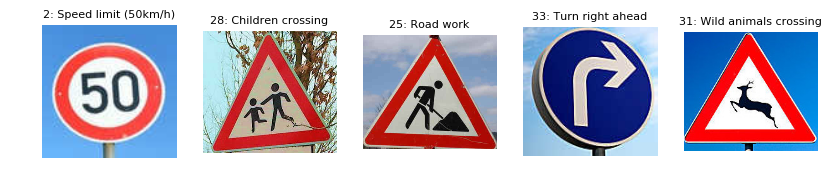

In [129]:
plt.figure(figsize=(10,3))
for i in range(1,5+1):
    plt.subplot(1,5,i)
    plt.imshow(new_X_test[i-1])
    _ = plt.axis('off')
    titl = "%d: %s" %(new_Y_test[i-1], signname[new_Y_test[i-1]])
    plt.title(titl, fontsize=8)

In [130]:
# What are its shapes?
for image in new_X_test:
    print(image.shape)

(104, 104, 3)
(268, 294, 3)
(309, 363, 3)
(143, 148, 3)
(189, 212, 3)


In [140]:
# We need to resize them and also normalize them
new_X_test = [normalization(cv2.resize(elem, (32, 32))) for elem in new_X_test]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The 5 images choosen are really clean and sharp. If I have to add anything, I would say that have some minor rotations, but nothing special. 

Mmm.. I'm wondering if it can be a problem that these images are a bit different compared with the training dataset. I mean, the images in the training set are very very hard (I can not correctly classify some of them), and this images are cristal clear. Let's check what happen.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [142]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_with_dropout(new_X_test, new_Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

While using only 5 images limit the confidence of an estimator (1 bad sample have a 20% impact on the result), seems that my model is working like a charm!! 100% accurate in the new test set.

It's having better accuracy in this set than the original test set. It's easy to spot why: these new images have much higher quality than the original ones. -> Our self-driving car should have very good cameras.

Note: I checked the accuracy manually in the next question.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [145]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: new_X_test, keep_prob: 1.0})

softmax

array([[  6.52086434e-23,   1.64290753e-07,   9.99999642e-01,
          1.83176113e-07,   8.85987410e-13,   4.24120898e-08,
          2.01496195e-28,   3.79069648e-15,   3.12551325e-15,
          9.04342493e-29,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.83931873e-16,   3.35010215e-24,
          1.41130724e-15,   5.03153239e-33,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.05736096e-34,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.41775869e-33,   0.00000000e+00,
          0.00000000e+00,   5.96517499e-29,   9.21959101e-33,
          0.00000000e+00,   0.00000000e+00,   6.00506729e-27,
          1.26601388e-31,   3.57458881e-28,   2.49450833e-32,
          1.38096857e-28,   0.00000000e+00,   1.97306099e-26,
          2.24318405e-28,   5.56027465e-24,   4.61512614e-36,
          8.09923225e-31],
       [  2.37442399e-10,   4.38091727e-17,   2.81931949e-19,
          1.28347805e-18,   7.72360019e-28,

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is really confident in every prediction for this set. The second option with the biggest probability in the whole new test set is 2.53902428e-04 for sample number 3.

It's so confident on sample number 5 that the first probability is 1.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [160]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = tf.nn.softmax(logits)
    top_5 = tf.nn.top_k(softmax, k=5)
    
    result = sess.run(top_5, feed_dict={x: new_X_test, keep_prob: 1.0})

result

TopKV2(values=array([[  9.99999642e-01,   1.83176113e-07,   1.64290753e-07,
          4.24120898e-08,   8.85987410e-13],
       [  9.99998569e-01,   1.46448610e-06,   3.32779626e-09,
          1.34989342e-09,   2.37442399e-10],
       [  9.99571621e-01,   2.22339993e-04,   2.05982011e-04,
          7.80399567e-09,   5.93777971e-10],
       [  9.99513865e-01,   2.53902428e-04,   1.05273000e-04,
          1.00086058e-04,   2.30384157e-05],
       [  1.00000000e+00,   1.94361292e-08,   3.47193496e-09,
          3.27567706e-09,   2.20032464e-11]], dtype=float32), indices=array([[ 2,  3,  1,  5,  4],
       [28, 29, 23, 30,  0],
       [25, 22, 20, 29, 30],
       [33, 40, 35, 36, 34],
       [31, 21, 29, 25, 23]], dtype=int32))

In [151]:
# result[1] contains in each row the most probably results
result[1]

array([[ 2,  3,  1,  5,  4],
       [28, 29, 23, 30,  0],
       [25, 22, 20, 29, 30],
       [33, 40, 35, 36, 34],
       [31, 21, 29, 25, 23]], dtype=int32)

In [153]:
# We can see that the first class selected in each sample match it's correct label

print("Predictions: ", result[1][:,0])
print("Labels", new_Y_test)

Predictions:  [ 2 28 25 33 31]
Labels [2, 28, 25, 33, 31]


In [159]:
result[0][:,0:2]

array([[  9.99999642e-01,   1.83176113e-07],
       [  9.99998569e-01,   1.46448610e-06],
       [  9.99571621e-01,   2.22339993e-04],
       [  9.99513865e-01,   2.53902428e-04],
       [  1.00000000e+00,   1.94361292e-08]], dtype=float32)

It's impressive. The model is really certain of it's predictions.